In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
rating_cols = ['user_id', 'item_id', 'rating', 'timestamp']
ratings = pd.read_csv('C:/Users/alpya/Documents/movie-recommender/data/raw/ml-100k/u.data', sep='\t', names=rating_cols)

In [7]:
# Load movies
movies_cols = ['item_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL',
               'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime',
               'Documentary', 'Drama', 'Fantasy', 'Film-noir', 'Horror', 'Musical', 'Mystery',
               'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('C:/Users/alpya/Documents/movie-recommender/data/raw/ml-100k/u.item', sep='|', encoding='latin-1', names=movies_cols, usecols=range(24))

In [8]:
# Merge Ratings with movie titles
df = pd.merge(ratings, movies, on='item_id')

In [9]:
# Quick Look
print('Dataset shape: ', df.shape)
df.head()

Dataset shape:  (100000, 27)


,user_id,item_id,rating,timestamp,title,release_date,video_release_date,IMDb_URL,unknown,Action,...,Fantasy,Film-noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,0,0,0,0


Number of unique users:  943
Number of unique movies:  1664
Average ratings:  3.52986


title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: count, dtype: int64

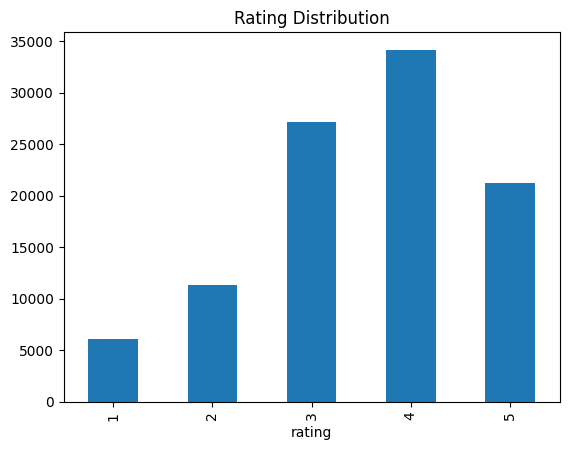

In [12]:
print('Number of unique users: ', df['user_id'].nunique())
print('Number of unique movies: ', df['title'].nunique())
print('Average ratings: ', df['rating'].mean())

# Rating Distribution
df['rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution')

# Most Rated movies
df['title'].value_counts().head(10)

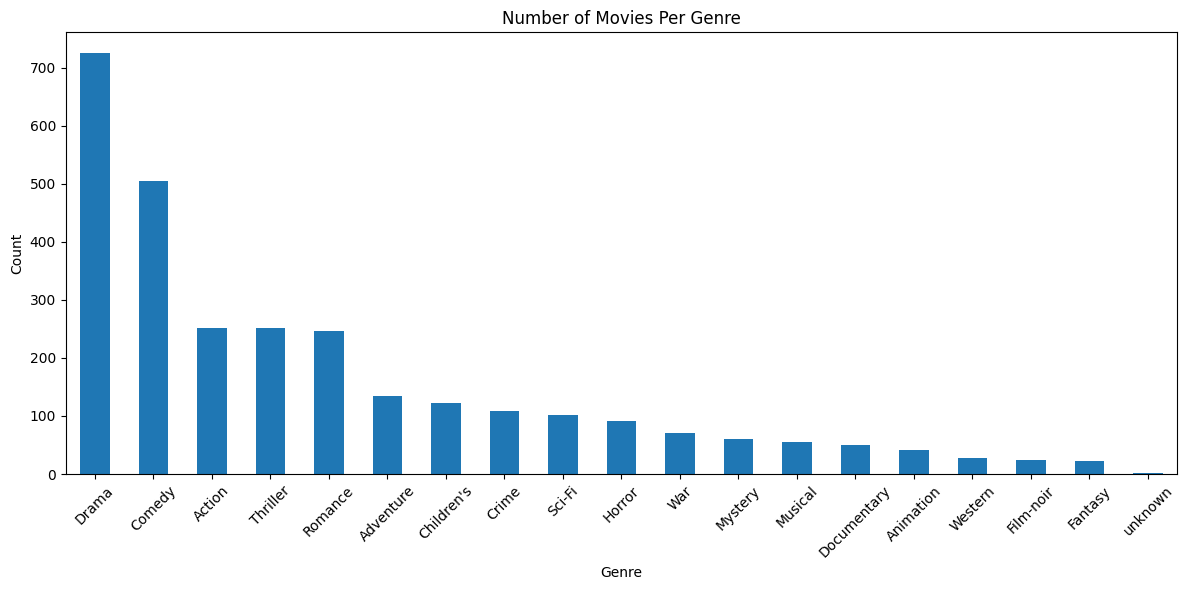

In [15]:
# List of genre columns
genre_cols = movies_cols[5:]

# Count how many movies belong to each genre
genre_counts = movies[genre_cols].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Number of Movies Per Genre')
plt.ylabel('Count')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
user_activity = df['user_id'].value_counts()

print('Average ratings per user: ', user_activity.mean())
print('Top 5 most active users: ')
print(user_activity.head())

Average ratings per user:  106.04453870625663
Top 5 most active users: 
user_id
405    737
655    685
13     636
450    540
276    518
Name: count, dtype: int64


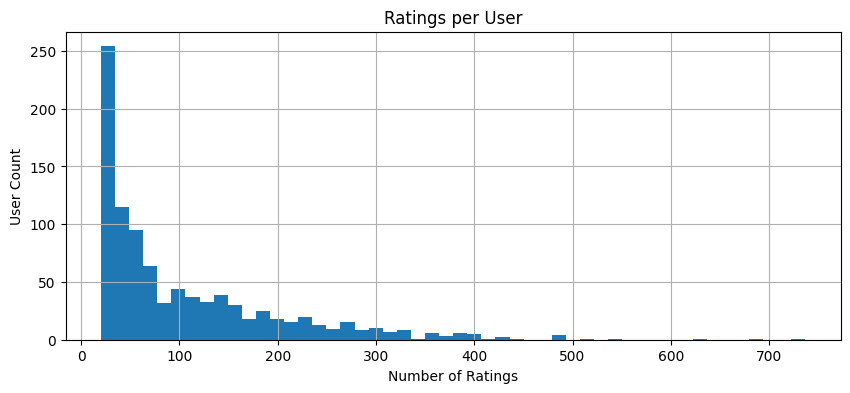

In [17]:
# Plot Distribution
user_activity.hist(bins=50, figsize=(10, 4))
plt.title('Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('User Count')
plt.show()

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: count, dtype: int64


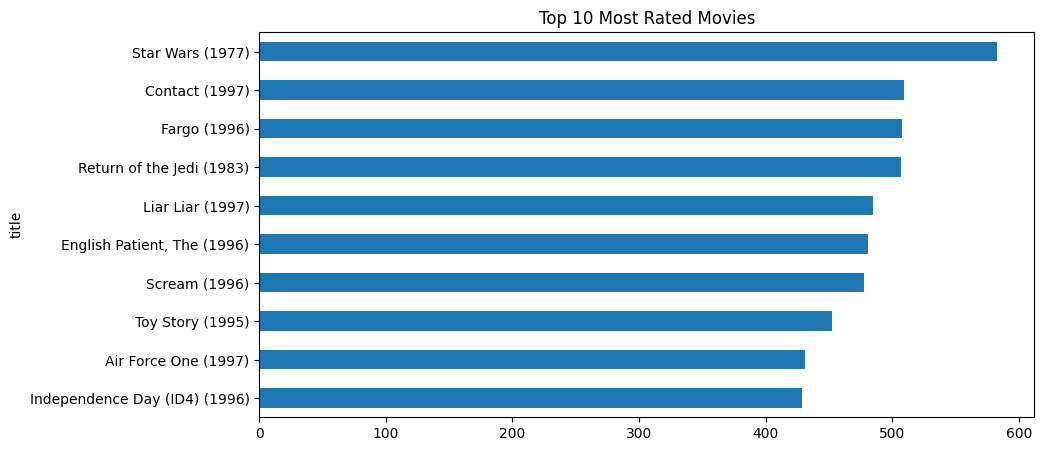

In [18]:
# Most Rated Movies
movie_rating_counts = df['title'].value_counts()

# Top 10 most rated movies
top_movies = movie_rating_counts.head(10)
print(top_movies)

top_movies.plot(kind='barh', title='Top 10 Most Rated Movies', figsize=(10, 5))
plt.gca().invert_yaxis()
plt.show()

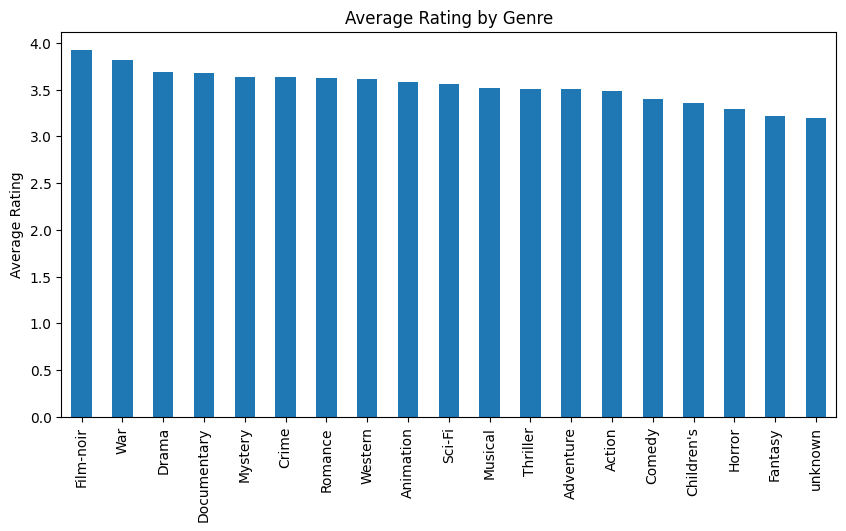

In [19]:
# Average Rating per Genre
genre_avg_ratings = {}

for genre in genre_cols:
    genre_avg_ratings[genre] = df[df[genre] == 1]['rating'].mean()

# Convert series and sort
genre_avg_ratings = pd.Series(genre_avg_ratings).sort_values(ascending=False)

# Plot
genre_avg_ratings.plot(kind='bar', figsize=(10, 5), title='Average Rating by Genre')
plt.ylabel('Average Rating')
plt.show()

Sparsity of user-movie matrix: 93.65%


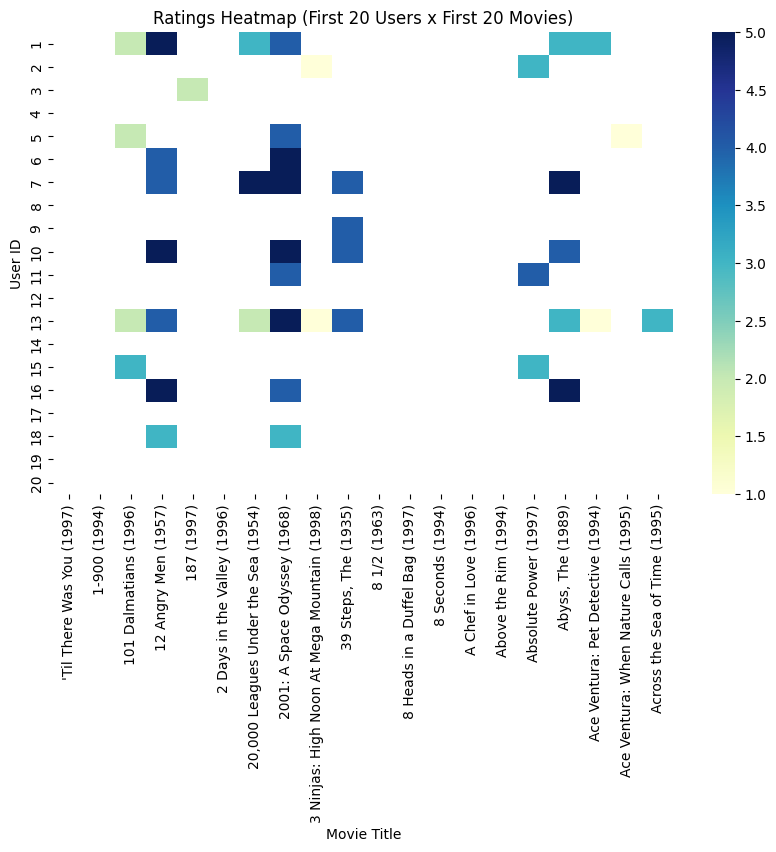

In [21]:
# Creating a user-movie rating matrix
user_movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating')

# Check sparsity
sparsity = 1.0 - (user_movie_matrix.count().sum() / user_movie_matrix.size)
print(f'Sparsity of user-movie matrix: {sparsity:.2%}')

# Visualizing a small section
plt.figure(figsize=(10, 6))
sns.heatmap(user_movie_matrix.iloc[:20, :20], cmap='YlGnBu', cbar=True)
plt.title('Ratings Heatmap (First 20 Users x First 20 Movies)')
plt.xlabel('Movie Title')
plt.ylabel('User ID')
plt.show()

In [22]:
# Correlation 
movie_corr = user_movie_matrix.corr(method='pearson', min_periods=50)

star_wars_corr = movie_corr['Star Wars (1977)'].drop('Star Wars (1977)').sort_values(ascending=False).head(10)
print('Movies most similar to Star Wars (1977):')
print(star_wars_corr)

Movies most similar to Star Wars (1977):
title
Empire Strikes Back, The (1980)                       0.747981
Return of the Jedi (1983)                             0.672556
Raiders of the Lost Ark (1981)                        0.536117
Austin Powers: International Man of Mystery (1997)    0.377433
Sting, The (1973)                                     0.367538
Indiana Jones and the Last Crusade (1989)             0.350107
Pinocchio (1940)                                      0.347868
Things to Do in Denver when You're Dead (1995)        0.337714
Shadowlands (1993)                                    0.332941
Frighteners, The (1996)                               0.332729
Name: Star Wars (1977), dtype: float64


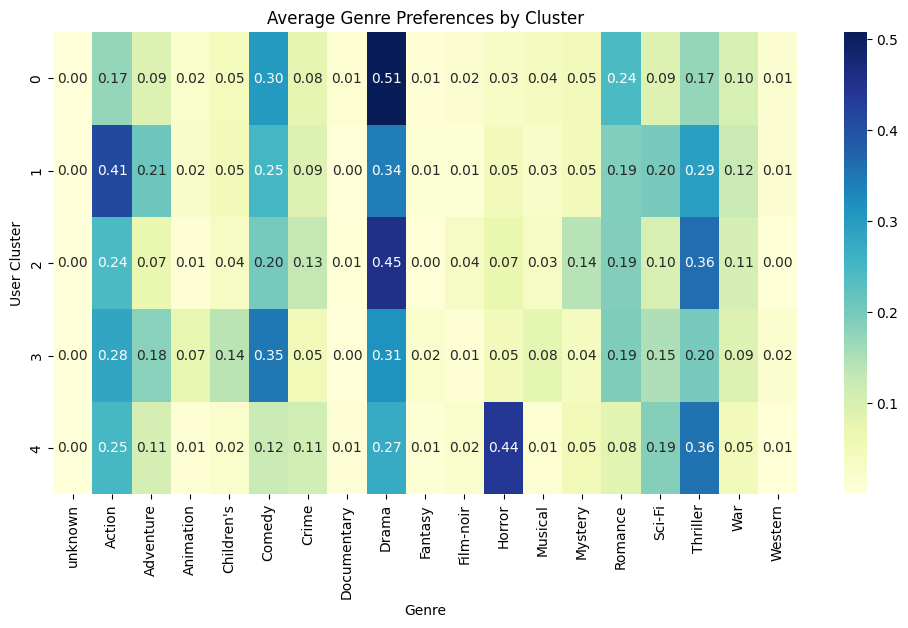

In [24]:
# User Rating Patterns via Clustering

## Aggregating genre preferences per users
user_genres = df.groupby('user_id')[genre_cols].mean()

## Normalizing
scaler = StandardScaler()
user_genres_scaled = scaler.fit_transform(user_genres)

## KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(user_genres_scaled)
user_genres['cluster'] = clusters

## Visualizing cluster genre preferences
cluster_means = user_genres.groupby('cluster').mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Average Genre Preferences by Cluster')
plt.xlabel('Genre')
plt.ylabel('User Cluster')
plt.show()